In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("../data/OCM-data.csv")
df.head(5)

,Name,M1,M1_atom_number,M2,M2_atom_number,M3,M3_atom_number,Support,Support_ID,M2_mol,...,C2y,C2H6y,C2H4y,COy,CO2y,C2s,C2H6s,C2H4s,COs,CO2s
0,Mn-Na2WO4/BN,Mn,25,Na,11,W,74,BN,4,0.37,...,5.86,0.68,5.18,30.82,6.01,16.15,1.87,14.28,84.95,16.57
1,Mn-Na2WO4/BN,Mn,25,Na,11,W,74,BN,4,0.37,...,6.29,0.70,5.59,31.29,5.76,16.98,1.89,15.09,84.48,15.55
2,Mn-Na2WO4/BN,Mn,25,Na,11,W,74,BN,4,0.37,...,5.34,0.55,4.79,21.62,3.12,19.90,2.05,17.85,80.58,11.63
3,Mn-Na2WO4/BN,Mn,25,Na,11,W,74,BN,4,0.37,...,6.16,0.62,5.54,22.49,3.00,25.17,2.53,22.64,91.91,12.26
4,Mn-Na2WO4/BN,Mn,25,Na,11,W,74,BN,4,0.37,...,6.54,0.65,5.89,22.34,2.86,27.22,2.70,24.51,92.97,11.90


In [3]:
selected_df = df[['M1_atom_number', 'M2_atom_number', 'M3_atom_number', 'Support_ID', 'M2_mol', 'M3_mol', 'M1_mol_percentage', 'M2_mol_percentage', 'M3_mol_percentage', 'Temp', 'Total_flow', 'Ar_flow', 'CH4_flow', 'O2_flow', 'CT']]
selected_df

,M1_atom_number,M2_atom_number,M3_atom_number,Support_ID,M2_mol,M3_mol,M1_mol_percentage,M2_mol_percentage,M3_mol_percentage,Temp,Total_flow,Ar_flow,CH4_flow,O2_flow,CT
0,25,11,74,4,0.37,0.185,40,40,20,900,10,1.5,5.7,2.8,0.75
1,25,11,74,4,0.37,0.185,40,40,20,900,15,2.3,8.5,4.3,0.50
2,25,11,74,4,0.37,0.185,40,40,20,900,20,3.0,11.3,5.7,0.38
3,25,11,74,4,0.37,0.185,40,40,20,900,10,1.5,6.4,2.1,0.75
4,25,11,74,4,0.37,0.185,40,40,20,900,15,2.3,9.6,3.2,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12703,0,11,0,11,0.37,0.000,0,100,0,700,15,10.5,3.6,0.9,0.50
12704,0,11,0,11,0.37,0.000,0,100,0,700,20,14.0,4.8,1.2,0.38
12705,0,11,0,11,0.37,0.000,0,100,0,700,10,7.0,2.6,0.4,0.75
12706,0,11,0,11,0.37,0.000,0,100,0,700,15,10.5,3.9,0.6,0.50


In [4]:
std_df = StandardScaler().fit_transform(selected_df)
std_df

array([[ 0.08747892,  0.10497433,  0.69162147, ..., -0.31039657,
         0.64122604,  1.3408736 ],
       [ 0.08747892,  0.10497433,  0.69162147, ...,  0.53294506,
         1.89126958, -0.28115092],
       [ 0.08747892,  0.10497433,  0.69162147, ...,  1.37628668,
         3.05797688, -1.05972268],
       ...,
       [-1.28374929,  0.10497433, -1.64315962, ..., -1.24409623,
        -1.35884362,  1.3408736 ],
       [-1.28374929,  0.10497433, -1.64315962, ..., -0.85254476,
        -1.19217115, -0.28115092],
       [-1.28374929,  0.10497433, -1.64315962, ..., -0.49111263,
        -0.94216245, -1.05972268]])

In [7]:
pca_out = PCA(n_components=6).fit(std_df)
pca_out.explained_variance_ratio_

array([0.34907386, 0.18997599, 0.11947987, 0.07309733, 0.06622208,
       0.06037136])

In [47]:
pca_out.explained_variance_

array([5.23651991, 2.84986405, 1.79233907, 1.09654622, 0.99340932,
       0.90564159])

In [8]:
np.cumsum(pca_out.explained_variance_ratio_)

array([0.34907386, 0.53904984, 0.65852971, 0.73162704, 0.79784912,
       0.85822047])

In [25]:
loadings = pca_out.components_.T
num_pc = pca_out.n_components_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame(loadings, columns=pc_list, index=selected_df.columns)
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6
M1_atom_number,-3.466546e-01,1.551673e-16,-9.543469e-17,-8.865763e-02,-5.604337e-02,1.279993e-02
M2_atom_number,-2.625311e-01,-5.768044e-16,-1.251821e-16,-2.337657e-01,-6.800214e-02,-1.987502e-01
M3_atom_number,-4.056157e-01,3.201341e-16,7.619177e-17,1.837214e-01,4.784016e-02,1.752398e-01
Support_ID,-1.591372e-01,-6.181018e-18,2.448605e-16,1.448662e-01,1.341860e-01,-9.367655e-01
M2_mol,-3.718749e-01,-1.209506e-16,-1.854168e-16,-3.233469e-01,-1.056147e-01,1.095578e-01
M3_mol,-4.144670e-01,1.653441e-16,-1.570010e-17,2.027979e-01,5.577214e-02,1.261882e-01
M1_mol_percentage,-3.705371e-01,1.882419e-17,7.139445e-18,2.802205e-02,-3.689174e-02,5.175303e-02
M2_mol_percentage,-3.369221e-01,-3.902343e-16,-1.433135e-16,-4.327948e-01,-8.668128e-02,-4.059613e-02
M3_mol_percentage,-2.452939e-01,1.287022e-16,1.304772e-16,6.755934e-01,2.320393e-01,1.113684e-01
Temp,-1.439529e-03,2.224388e-16,1.901073e-16,3.042209e-01,-9.460224e-01,-8.625682e-02


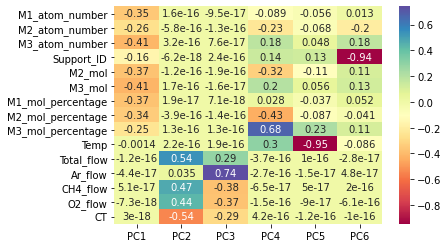

In [26]:
import seaborn as sns
ax = sns.heatmap(loadings_df, annot=True, cmap="Spectral")
plt.show()

[[-3.46654558e-01  1.55167334e-16 -9.54346864e-17 -8.86576320e-02
  -5.60433662e-02  1.27999275e-02]
 [-2.62531052e-01 -5.76804427e-16 -1.25182065e-16 -2.33765706e-01
  -6.80021350e-02 -1.98750203e-01]
 [-4.05615734e-01  3.20134092e-16  7.61917725e-17  1.83721385e-01
   4.78401622e-02  1.75239778e-01]
 [-1.59137174e-01 -6.18101800e-18  2.44860484e-16  1.44866184e-01
   1.34186037e-01 -9.36765491e-01]
 [-3.71874856e-01 -1.20950560e-16 -1.85416790e-16 -3.23346913e-01
  -1.05614743e-01  1.09557819e-01]
 [-4.14467044e-01  1.65344063e-16 -1.57000979e-17  2.02797900e-01
   5.57721450e-02  1.26188155e-01]
 [-3.70537127e-01  1.88241949e-17  7.13944501e-18  2.80220457e-02
  -3.68917390e-02  5.17530287e-02]
 [-3.36922108e-01 -3.90234325e-16 -1.43313506e-16 -4.32794797e-01
  -8.66812769e-02 -4.05961270e-02]
 [-2.45293947e-01  1.28702157e-16  1.30477226e-16  6.75593442e-01
   2.32039261e-01  1.11368428e-01]
 [-1.43952865e-03  2.22438820e-16  1.90107307e-16  3.04220932e-01
  -9.46022414e-01 -8.6256

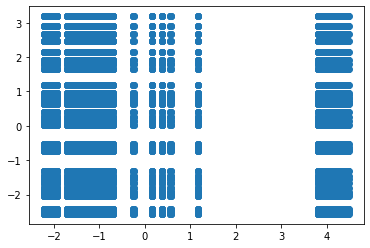

In [46]:
pca_score = PCA(n_components=6).fit_transform(std_df)
print(pca_out.components_.T)
plt.scatter(pca_score[:,0], pca_score[:,1])
plt.show()

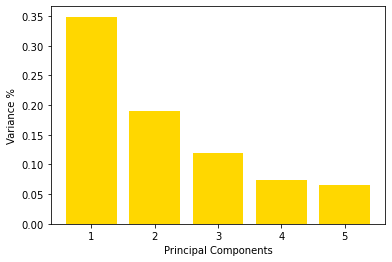

In [16]:
PC = range(1, pca.n_components_+1)
plt.bar(PC, pca.explained_variance_ratio_, color='gold')
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.xticks(PC)
plt.show()

In [17]:
PCA_components = pd.DataFrame(principalComponents)
PCA_components

,0,1,2,3,4
0,-0.931336,-1.299373,-1.774844,0.119251,-1.822654
1,-0.931336,1.191156,-1.579387,0.119251,-1.822654
2,-0.931336,3.188947,-1.617250,0.119251,-1.822654
3,-0.931336,-1.453914,-1.637418,0.119251,-1.822654
4,-0.931336,0.948306,-1.363432,0.119251,-1.822654
...,...,...,...,...,...
12703,1.176858,-0.664988,1.599783,-3.510212,0.747488
12704,1.176858,0.731509,2.620241,-3.510212,0.747488
12705,1.176858,-2.561208,0.373350,-3.510212,0.747488
12706,1.176858,-0.731220,1.658680,-3.510212,0.747488


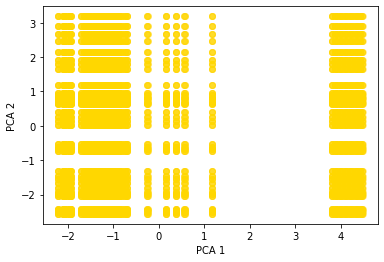

In [18]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.3, color='gold')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [32]:
pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], index=selected_df.columns)

,PC1,PC2,PC3,PC4,PC5
M1_atom_number,-3.466546e-01,2.032831e-18,-3.660973e-17,-8.865763e-02,-5.604337e-02
M2_atom_number,-2.625311e-01,1.322723e-16,-1.100996e-16,-2.337657e-01,-6.800214e-02
M3_atom_number,-4.056157e-01,2.608398e-17,8.539157e-17,1.837214e-01,4.784016e-02
Support_ID,-1.591372e-01,-1.926286e-18,3.172411e-16,1.448662e-01,1.341860e-01
M2_mol,-3.718749e-01,1.566048e-16,-9.066137e-17,-3.233469e-01,-1.056147e-01
M3_mol,-4.144670e-01,2.800612e-17,-7.386440e-17,2.027979e-01,5.577214e-02
M1_mol_percentage,-3.705371e-01,-1.015784e-17,-1.624489e-17,2.802205e-02,-3.689174e-02
M2_mol_percentage,-3.369221e-01,2.471318e-16,-7.496940e-17,-4.327948e-01,-8.668128e-02
M3_mol_percentage,-2.452939e-01,-3.023487e-16,-3.735613e-17,6.755934e-01,2.320393e-01
Temp,-1.439529e-03,1.799069e-16,-3.030129e-16,3.042209e-01,-9.460224e-01


In [38]:
load = pca.components_.T * np.sqrt(pca.explained_variance_)
pd.DataFrame(load, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], index=selected_df.columns)

,PC1,PC2,PC3,PC4,PC5
M1_atom_number,-7.932650e-01,3.431732e-18,-4.901247e-17,-9.283882e-02,-5.585838e-02
M2_atom_number,-6.007615e-01,2.232961e-16,-1.473994e-16,-2.447903e-01,-6.777767e-02
M3_atom_number,-9.281885e-01,4.403377e-17,1.143207e-16,1.923859e-01,4.768225e-02
Support_ID,-3.641607e-01,-3.251868e-18,4.247169e-16,1.516982e-01,1.337431e-01
M2_mol,-8.509777e-01,2.643731e-16,-1.213759e-16,-3.385963e-01,-1.052661e-01
M3_mol,-9.484433e-01,4.727865e-17,-9.888838e-17,2.123621e-01,5.558805e-02
M1_mol_percentage,-8.479165e-01,-1.714799e-17,-2.174838e-17,2.934359e-02,-3.676997e-02
M2_mol_percentage,-7.709938e-01,4.171965e-16,-1.003677e-16,-4.532058e-01,-8.639516e-02
M3_mol_percentage,-5.613170e-01,-5.104113e-16,-5.001174e-17,7.074551e-01,2.312733e-01
Temp,-3.294137e-03,3.037105e-16,-4.056684e-16,3.185683e-01,-9.428998e-01
